In [3]:
import pandas as pd

# **Saved Data Loading**

In [4]:
X_train_resampled = pd.read_csv("/content/drive/MyDrive/ML and DL DataSets/End_to_End_Financial_Fraud_Anomaly_Detection/X_train_resampled.csv")
print(X_train_resampled.shape)
X_train_resampled.head()

(6227267, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.289629,-0.208166,-0.215124,-0.323040,-0.332622,0.188193,-0.153089,0.0,0.0,0.0,1.0,0.0
1,-0.297260,-0.158672,-0.164673,-0.323040,-0.332622,0.157286,-0.153089,0.0,0.0,0.0,1.0,0.0
2,-0.283965,-0.288598,-0.292326,-0.323040,-0.332622,0.143552,-0.153089,0.0,0.0,0.0,1.0,0.0
3,-0.294850,-0.270969,-0.276096,-0.323040,-0.332622,0.167046,-0.153089,0.0,0.0,0.0,1.0,0.0
4,-0.053665,-0.288598,-0.292326,0.652529,0.610181,0.143552,0.029012,0.0,1.0,0.0,0.0,0.0


In [5]:
y_train_resampled = pd.read_csv("/content/drive/MyDrive/ML and DL DataSets/End_to_End_Financial_Fraud_Anomaly_Detection/y_train_resampled.csv")
print(y_train_resampled.shape)
y_train_resampled.head()

(6227267, 1)


,isFraud
0,0
1,0
2,0
3,0
4,0


In [6]:
X_val_transformed = pd.read_csv("/content/drive/MyDrive/ML and DL DataSets/End_to_End_Financial_Fraud_Anomaly_Detection/X_val_transformed.csv")
print(X_val_transformed.shape)
X_val_transformed.head()

(954394, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.154663,-0.176297,-0.274390,0.619222,0.613183,1.987626,0.182610,0.0,1.0,0.0,0.0,0.0
1,0.347197,-0.269497,-0.292326,-0.310974,-0.216280,0.517697,0.324563,0.0,0.0,0.0,0.0,1.0
2,0.017028,3.701566,3.714172,-0.011447,-0.095876,-1.143082,-0.387310,1.0,0.0,0.0,0.0,0.0
3,-0.150423,-0.288598,-0.292326,0.430373,0.316398,0.143552,-0.371626,0.0,1.0,0.0,0.0,0.0
4,-0.051162,-0.278733,-0.292326,-0.323040,-0.292118,0.336786,0.030857,0.0,1.0,0.0,0.0,0.0


In [7]:
y_val = pd.read_csv("/content/drive/MyDrive/ML and DL DataSets/End_to_End_Financial_Fraud_Anomaly_Detection/y_val.csv")
print(y_val.shape)
y_val.head()

(954394, 1)


,isFraud
0,0
1,0
2,0
3,0
4,0


In [8]:
X_test_transformed = pd.read_csv("/content/drive/MyDrive/ML and DL DataSets/End_to_End_Financial_Fraud_Anomaly_Detection/X_test_transformed.csv")
print(X_test_transformed.shape)
X_test_transformed.head()

(954393, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.252059,-0.281377,-0.172300,-0.190179,-0.299416,-2.094986,-0.560596,1.0,0.0,0.0,0.0,0.0
1,-0.281157,-0.278088,-0.285925,-0.323040,-0.332622,0.222507,-0.153089,0.0,0.0,0.0,1.0,0.0
2,-0.045796,-0.251710,-0.203832,-0.263924,-0.319297,-0.888641,-0.340991,1.0,0.0,0.0,0.0,0.0
3,2.296640,-0.288598,-0.292326,0.616217,0.958150,0.143552,1.761868,0.0,0.0,0.0,0.0,1.0
4,-0.169809,0.722423,0.733118,-0.200926,-0.240871,-0.386375,-0.249558,1.0,0.0,0.0,0.0,0.0


In [9]:
y_test = pd.read_csv("/content/drive/MyDrive/ML and DL DataSets/End_to_End_Financial_Fraud_Anomaly_Detection/y_test.csv")
print(y_test.shape)
y_test.head()

(954393, 1)


,isFraud
0,0
1,0
2,0
3,0
4,0


# **Train data with different ML Algorithm**

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [10]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, matthews_corrcoef

In [13]:
def evaluate_models_on_validation(X_train, y_train, X_val, y_val):

  classifiers = {
    "Random Forest": RandomForestClassifier(
        random_state=40,
        n_estimators=100,  # Number of trees in the forest
        max_depth=10,      # Maximum depth of the tree
        min_samples_split=5, # Minimum number of samples required to split an internal node
        min_samples_leaf=2,  # Minimum number of samples required to be at a leaf node
        class_weight='balanced', # Adjust weights inversely proportional to class frequencies
        n_jobs=-1,           # Use all available processors
        oob_score=True       # Use out-of-bag samples to estimate the generalization accuracy.
    ),
    "LightGBM": LGBMClassifier(
        random_state=40,
        n_estimators=100,
        learning_rate=0.1,   # Boosting learning rate
        num_leaves=31,       # Maximum tree leaves for base learners
        max_depth=8,         # Maximum tree depth for base learners
        min_child_samples=20, # Minimum number of data needed in a child(leaf)
        objective='binary',  # Specify the learning task and the corresponding learning objective
        metric='auc',        # Metric to be used during training (area under the curve)
        n_jobs=-1,
        class_weight='balanced'
    ),
    "XGBoost": XGBClassifier(
        random_state=40,
        eval_metric="logloss",
        n_estimators=100,
        learning_rate=0.1,
        max_depth=8,
        min_child_weight=1,  # Minimum sum of instance weight(hessian) needed in a child.
        gamma=0,             # Minimum loss reduction required to make a further partition on a leaf node of the tree.
        subsample=0.8,       # Subsample ratio of the training instances.
        colsample_bytree=0.8,# Subsample ratio of columns when constructing each tree.
        objective='binary:logistic',
        n_jobs=-1,
        scale_pos_weight=10 # Control the balance of positive and negative weights, useful for unbalanced classes.
    ),
    "CatBoost": CatBoostClassifier(
        verbose=0,
        random_state=40,
        iterations=100,      # Maximum number of trees that can be built.
        learning_rate=0.1,
        depth=8,             # Depth of the trees.
        l2_leaf_reg=3,       # L2 regularization coefficient.
        loss_function='Logloss',
        class_weights=[1, 10] # Weights for the classes, useful for imbalanced datasets.
    )
}

  for name, clf in classifiers.items():
        print(f"\nTraining {name} and evaluating on the validation set...")
        # Fit the model on training data
        model = clf.fit(X_train, y_train)

        # Predict on the validation set
        y_pred = model.predict(X_val)

        # Print evaluation metrics
        print(f"\nClassification Report for {name} on validation data:\n")
        print(classification_report(y_val, y_pred))

        accuracy = accuracy_score(y_val, y_pred)
        matthews_corr = matthews_corrcoef(y_val, y_pred)

        print(f"Validation Accuracy Score: {accuracy:.4f}")
        print(f"Validation Matthews Correlation Coefficient: {matthews_corr:.4f}")

In [14]:
evaluate_models_on_validation(X_train_resampled, y_train_resampled, X_val_transformed, y_val)


Training Random Forest and evaluating on the validation set...


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Classification Report for Random Forest on validation data:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    953167
           1       0.11      1.00      0.19      1227

    accuracy                           0.99    954394
   macro avg       0.55      0.99      0.59    954394
weighted avg       1.00      0.99      0.99    954394

Validation Accuracy Score: 0.9892
Validation Matthews Correlation Coefficient: 0.3237

Training LightGBM and evaluating on the validation set...


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1779219, number of negative: 4448048
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.155645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1801
[LightGBM] [Info] Number of data points in the train set: 6227267, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000

Classification Report for LightGBM on validation data:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    953167
           1       0.20      1.00      0.33      1227

    accuracy                           0.99    954394
   macro avg       0.60      1.00      0.66    954394
weighted avg       1.00      0.99      1.00    954394

Validation Accuracy Score: 0.9948
Validation Matthew

Based on the provided classification reports and evaluation metrics, **LightGBM and XGBoost** appear to be the best-performing models for fraud detection.

**Key Observations:**

* **Recall for Fraudulent Transactions (Class 1):**
    * All models achieve near-perfect recall (1.00 or 0.99) for class 1, indicating they are very effective at identifying fraudulent transactions. This is crucial in fraud detection, where minimizing false negatives is paramount.
* **Precision for Fraudulent Transactions (Class 1):**
    * LightGBM and XGBoost have significantly higher precision (0.20) compared to Random Forest (0.11) and CatBoost (0.09). Higher precision means fewer false positives, which is also important to reduce unnecessary investigations.
* **F1-Score for Fraudulent Transactions (Class 1):**
    * LightGBM and XGBoost also have higher F1-scores (0.34 and 0.33, respectively) for class 1, which balances precision and recall.
* **Matthews Correlation Coefficient (MCC):**
    * LightGBM and XGBoost have the highest MCC values (0.4500 and 0.4448), indicating a better overall balance between true and false positives and negatives, especially in imbalanced datasets.
* **Accuracy:**
    * All models have very high accuracy due to the high imbalance of the dataset. Accuracy is not the best metric to use here.
* **Catboost and Random forest:**
    * Those models have the lowest precision for class 1. This means those models have the highest amount of false positives.

# **Hyperparameter Tuning of Machine Learning Model [XGBoost]**

In [15]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, matthews_corrcoef, roc_auc_score
import numpy as np

def tune_xgboost_with_random_search(X_train, y_train, X_val, y_val, n_iter=100, cv=3, random_state=42):
    """
    Tunes XGBoost classifier hyperparameters using RandomizedSearchCV, evaluates all models
    and prints the best one.

    Args:
        X_train (pd.DataFrame): Training features.
        y_train (pd.Series): Training target.
        X_val (pd.DataFrame): Validation features.
        y_val (pd.Series): Validation target.
        n_iter (int): Number of parameter settings that are sampled.
        cv (int): Number of folds in cross-validation.
        random_state (int): Random state for reproducibility.

    Returns:
        XGBClassifier: Best XGBoost model after tuning.
    """

    param_dist = {
        'n_estimators': np.arange(50, 501, 50),
        'learning_rate': np.arange(0.01, 0.31, 0.05),
        'max_depth': np.arange(3, 11),
        'subsample': np.arange(0.6, 1.01, 0.1),
        'colsample_bytree': np.arange(0.6, 1.01, 0.1),
        'min_child_weight': np.arange(1, 6),
        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
        'scale_pos_weight': [1, 5, 10, 20],  # Important for imbalanced datasets
    }

    xgb_clf = XGBClassifier(random_state=random_state, use_label_encoder=False, eval_metric="logloss")

    random_search = RandomizedSearchCV(
        xgb_clf,
        param_distributions=param_dist,
        n_iter=n_iter,
        cv=cv,
        scoring='roc_auc',  # Using ROC AUC as the scoring metric
        random_state=random_state,
        n_jobs=-1,  # Use all available processors
        verbose=2,
        return_train_score=True  # Return training scores as well
    )

    random_search.fit(X_train, y_train)

    print("Best Parameters:", random_search.best_params_)

    best_xgb = random_search.best_estimator_

    y_pred = best_xgb.predict(X_val)

    print("\nClassification Report for Tuned XGBoost on validation data:")
    print(classification_report(y_val, y_pred))

    print("Validation Accuracy Score:", accuracy_score(y_val, y_pred))
    print("Validation Matthews Correlation Coefficient:", matthews_corrcoef(y_val, y_pred))

    # Print performance of all models
    print("\nPerformance of all models:")
    results = pd.DataFrame(random_search.cv_results_)
    for i in range(len(results)):
        print(f"\nModel {i+1}:")
        print(f"Parameters: {results['params'][i]}")
        print(f"Mean Validation ROC AUC: {results['mean_test_score'][i]}")
        print(f"Mean Training ROC AUC: {results['mean_train_score'][i]}")
        y_pred_current = random_search.best_estimator_.predict(X_val)
        print("Validation Classification Report: ")
        print(classification_report(y_val, y_pred_current))
        print("Validation Accuracy Score:", accuracy_score(y_val, y_pred_current))
        print("Validation MCC:", matthews_corrcoef(y_val,y_pred_current))
        print("Validation ROC AUC: ", roc_auc_score(y_val, random_search.best_estimator_.predict_proba(X_val)[:, 1]))

    return best_xgb

In [16]:
# Extract 100000 data points from training data
X_train_subset = X_train_resampled[:500000]
y_train_subset = y_train_resampled[:500000]

# Extract 150000 data points from validation data
X_val_subset = X_val_transformed[:750000]
y_val_subset = y_val[:750000]

# Example usage:
tuned_xgb_model = tune_xgboost_with_random_search(X_train_subset, y_train_subset, X_val_subset, y_val_subset)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:39:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 200, 'min_child_weight': 4, 'max_depth': 7, 'learning_rate': 0.060000000000000005, 'gamma': 0, 'colsample_bytree': 0.6}

Classification Report for Tuned XGBoost on validation data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    749069
           1       0.84      0.79      0.82       931

    accuracy                           1.00    750000
   macro avg       0.92      0.90      0.91    750000
weighted avg       1.00      1.00      1.00    750000

Validation Accuracy Score: 0.9995573333333333
Validation Matthews Correlation Coefficient: 0.8168674106178103

Performance of all models:

Model 1:
Parameters: {'subsample': 0.8999999999999999, 'scale_pos_weight': 20, 'n_estimators': 400, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.16000000000000003, 'gamma': 0.2, 'colsample_bytree': 0.6}
Mean Validation ROC AUC: 0.9962214698785895
Mean Training ROC 

# **Train with Best Params of XGBoost Model**

In [10]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, matthews_corrcoef

# Best hyperparameters obtained from tuning
best_params = {
    "subsample": 0.7,
    "scale_pos_weight": 5,
    "n_estimators": 200,
    "min_child_weight": 4,
    "max_depth": 7,
    "learning_rate": 0.06,
    "gamma": 0,
    "colsample_bytree": 0.6,
}

# Create the XGBoost classifier using the best parameters
# We also add random_state, eval_metric, and use_label_encoder for consistency and to suppress warnings.
xgb_clf = XGBClassifier(
    random_state=42,
    eval_metric="logloss",
    use_label_encoder=False,
    **best_params
)

# Fit the model on the training data
xgb_clf.fit(X_train_resampled[:3500000], y_train_resampled[:3500000])

# Predict on the validation dataset
y_pred = xgb_clf.predict(X_val_transformed)

# Evaluate the performance on the validation data
print("Classification Report:")
print(classification_report(y_val, y_pred))

accuracy = accuracy_score(y_val, y_pred)
mcc = matthews_corrcoef(y_val, y_pred)

print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Matthews Correlation Coefficient: {mcc:.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:24:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    953167
           1       0.84      0.83      0.84      1227

    accuracy                           1.00    954394
   macro avg       0.92      0.92      0.92    954394
weighted avg       1.00      1.00      1.00    954394

Validation Accuracy: 0.9996
Validation Matthews Correlation Coefficient: 0.8376


# **Predict with test data**

In [11]:
# Predict on the validation dataset
y_pred = xgb_clf.predict(X_test_transformed)

# Evaluate the performance on the validation data
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Matthews Correlation Coefficient: {mcc:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    953192
           1       0.85      0.84      0.84      1201

    accuracy                           1.00    954393
   macro avg       0.92      0.92      0.92    954393
weighted avg       1.00      1.00      1.00    954393

Validation Accuracy: 0.9996
Validation Matthews Correlation Coefficient: 0.8443


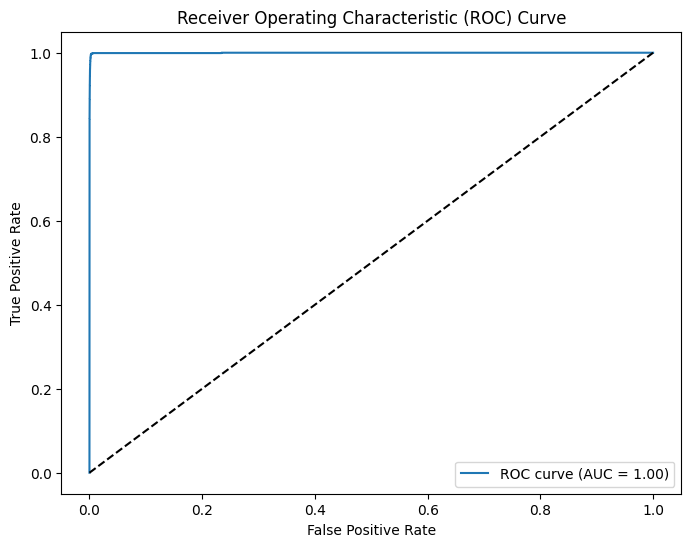

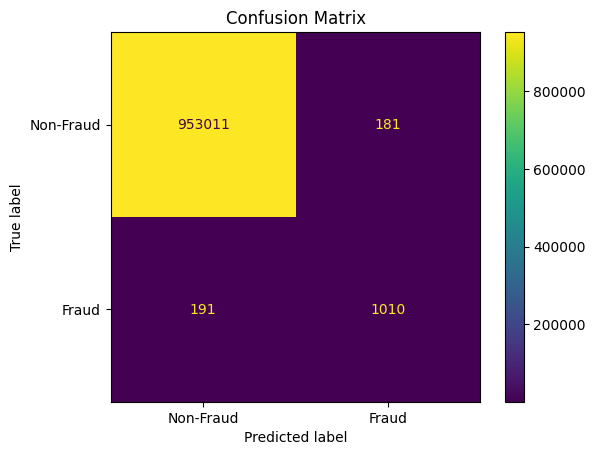

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Assuming xgb_clf, X_test_transformed, and y_test are already defined and trained

y_pred_proba = xgb_clf.predict_proba(X_test_transformed)[:, 1]  # Predict probabilities

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print()

# Confusion Matrix
y_pred = (y_pred_proba >= 0.5).astype(int)  # Predict classes (using default threshold)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()